In [1]:
import math 
import matplotlib.pyplot as plt  

# A problem to make cluster
def getDistance(x1, y1, x2, y2):
    return math.sqrt(math.pow(y2 - y1, 2) + math.pow(x2 - x1, 2))

# Function to Extract x values
def getX(data):
    x = []
    for p in data:
        x.append(p[0])
    return x

# Function to Extract y values
def getY(data):
    y = []
    for p in data:
        y.append(p[1])
    return y

# Function to plot the clusturs on the graph
def plotPoints(clusters, centroids, xLabel, yLabel):
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    
    for i in range(0, len(clusters)):
        data = clusters[i]
        plt.scatter(getX(data), getY(data)) 
        
    for i in range(0, len(centroids)):
        x,y = centroids[i]
        plt.annotate("Centroid: " + str(i), (x, y))
        
    plt.show() 

# Function to assign custerNumber to a point
def getClusterNumberToAssign(x, y, centroids):
    k = len(centroids)
    # print(x, y, centroids)
    
    bestCluster = 0
    bestDistance = getDistance(x,y,centroids[0][0], centroids[0][1])
    
    for i in range(1, k):
        distance = getDistance(x,y,centroids[i][0], centroids[i][1])
        # print(bestDistance, distance)
        if distance < bestDistance:
            bestDistance = distance
            bestCluster = i
            
    return bestCluster

# Function to create k clusters from the given data
def getClusters(data, clusterAssigned, k):
    clusters = [[] for i in range(k)]
    
    for i in range(len(data)):
        cluster = clusterAssigned[i]
        clusters[cluster].append(data[i])
        
    return clusters

# K Mean Algorithm which takes data and centroids, and also the labels from x and y
def kMean(data, centroids, xLabel, yLabel):
    print("Running kMean")
    
    k = len(centroids)   
    
    plotPoints([data], centroids,xLabel, yLabel)
    
    clusterAssigned = [-1 for point in data]
    # print(clusterAssigned)
    
    # Run the algorithm till no change happens
    iterationCount = 0
    while True:
        iterationCount += 1
        # print("Centroids:", centroids)
        
        # Run for only one iteration
        isChanged = False
        for i in range(len(data)):
            x,y = data[i]
            clusterId = getClusterNumberToAssign(x,y, centroids)
            # print([x,y], " => ", clusterId)
            
            if(clusterAssigned[i] == -1 or clusterAssigned[i] != clusterId):
                clusterAssigned[i] = clusterId
                isChanged = True
        
        # If No Changes Break
        if isChanged == False:
            break
        
        # Find the sum of every nodes
        clusterCount = [0 for i in range(k)]
        clusterSumX = [0 for i in range(k)]
        clusterSumY = [0 for i in range(k)]
        
        for i in range(len(data)):
            x, y = data[i]
            clusterId = clusterAssigned[i]
            
            clusterSumX[clusterId] += x
            clusterSumY[clusterId] += y
            clusterCount[clusterId] += 1
        
        # Assign the new Centroids
        for i in range(k):
            centroids[i] = [clusterSumX[i]/clusterCount[i],clusterSumY[i]/clusterCount[i]]
        
        # Find the new Centroids
        print("Iteration:", iterationCount)
        clusters = getClusters(data, clusterAssigned, k)
        plotPoints(clusters, centroids,xLabel, yLabel)
    
    print("Program End")

# Below is a Example of Clustering using the IPL data 
In the below program we are grouping data in 4 Clusters
- Cluster 1: Batsman and also a Baller
- Cluster 2: Batsman but not a Baller
- Cluster 3: Not a Batsman but a Baller
- Cluster 4: Not a Batsman nor a Baller

Running kMean


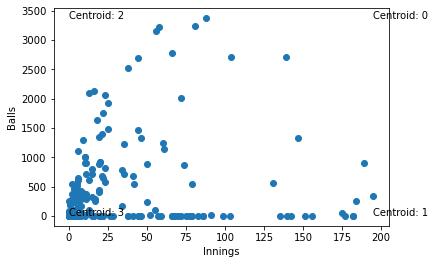

Iteration: 1


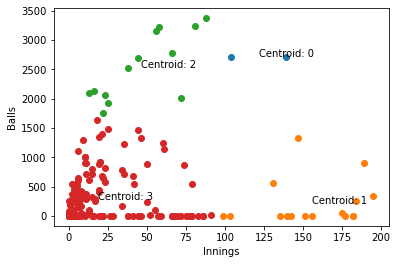

Iteration: 2


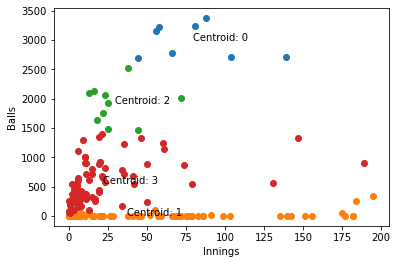

Iteration: 3


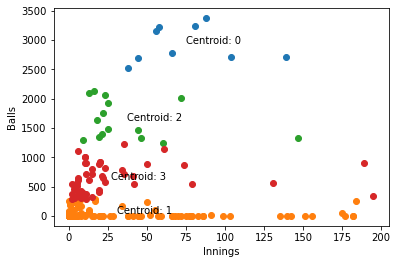

Iteration: 4


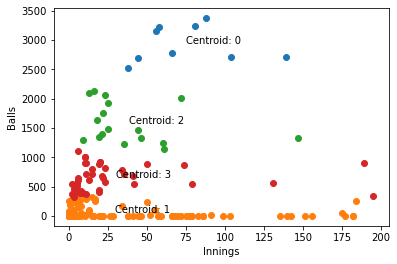

Iteration: 5


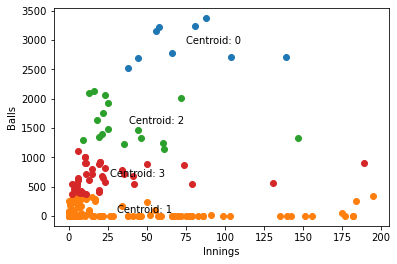

Program End


In [2]:
# Without Normalization
import pandas as pd
csvData = pd.read_csv('ipl_player_data_2021.csv');

data = []
names = csvData['Name'].values
innings = csvData['Innings'].values
balls = csvData['Balls'].values

maxInnings = 0
maxBalls = 0

# Get the sum of all the innings and balls
for i in range(len(names)):
    maxInnings = max(innings[i],maxInnings)
    maxBalls = max(balls[i],maxBalls)
    
    data.append([innings[i], balls[i]])

# print(data)
# Centroids: 1st for batters and second for ballers, thrid for average both, fourth allrounders
centroids = [[maxInnings, maxBalls],[maxInnings,0],[0, maxBalls], [0,0]]
kMean(data,centroids, "Innings", "Balls")

Running kMean


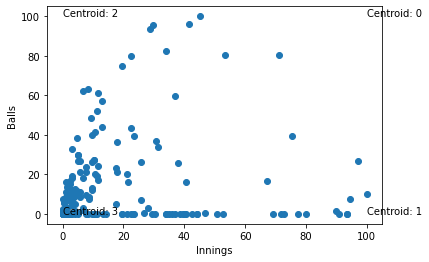

Iteration: 1


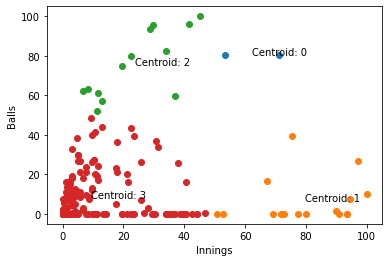

Iteration: 2


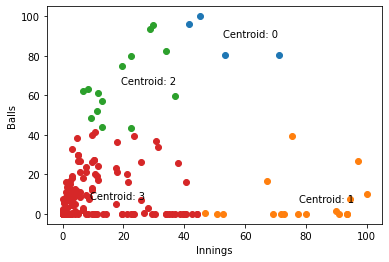

Iteration: 3


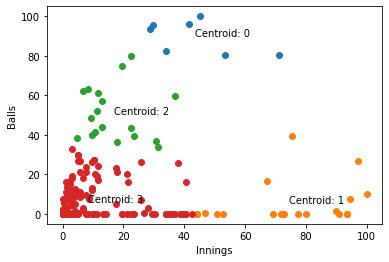

Iteration: 4


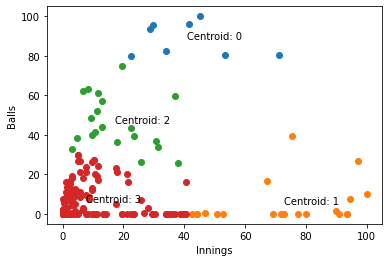

Iteration: 5


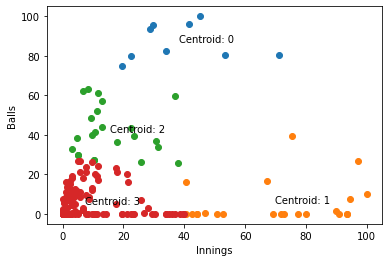

Iteration: 6


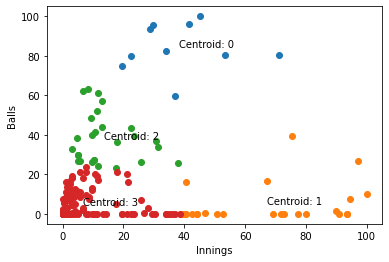

Iteration: 7


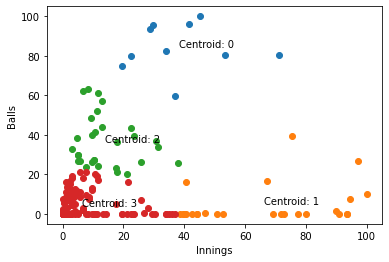

Iteration: 8


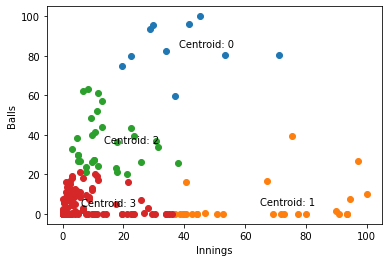

Iteration: 9


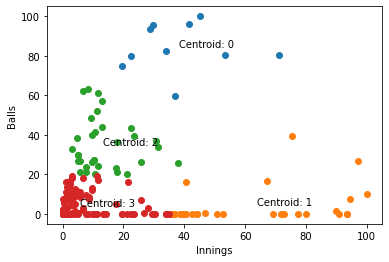

Iteration: 10


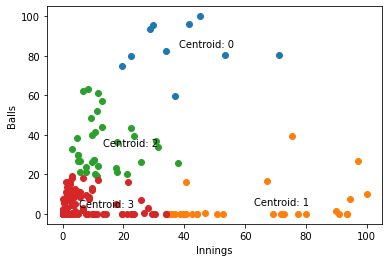

Iteration: 11


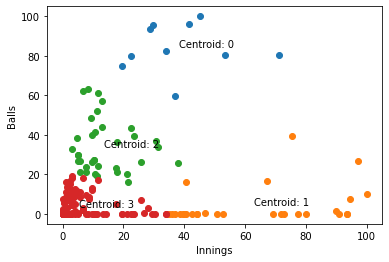

Program End


In [3]:
# With Normalization using MinMax
import pandas as pd

# We have to normalize the given data in the range of 0 to 100
def minMaxNormalize(data, new_min, new_max):
    normalizedData = []
    
    old_max = data[0]
    old_min = data[0]
    for value in data:
        old_max = max(value, old_max)
        old_min = min(value, old_min)
    
    for value in data:
        newValue = (value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
        normalizedData.append(newValue)
    
    return normalizedData

csvData = pd.read_csv('ipl_player_data_2021.csv');

data = []
names = csvData['Name'].values
innings = csvData['Innings'].values
balls = csvData['Balls'].values

normalizedInnings = minMaxNormalize(innings, 0, 100)
normalizedBalls = minMaxNormalize(balls, 0, 100)

# Get the sum of all the innings and balls
for i in range(len(names)):
    data.append([normalizedInnings[i], normalizedBalls[i]])

# print(data)
centroids = [[100,100], [100,0],[0, 100], [0,0]]
kMean(data,centroids,"Innings", "Balls")